In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

In [3]:
test_measure.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


Number of participants: 857


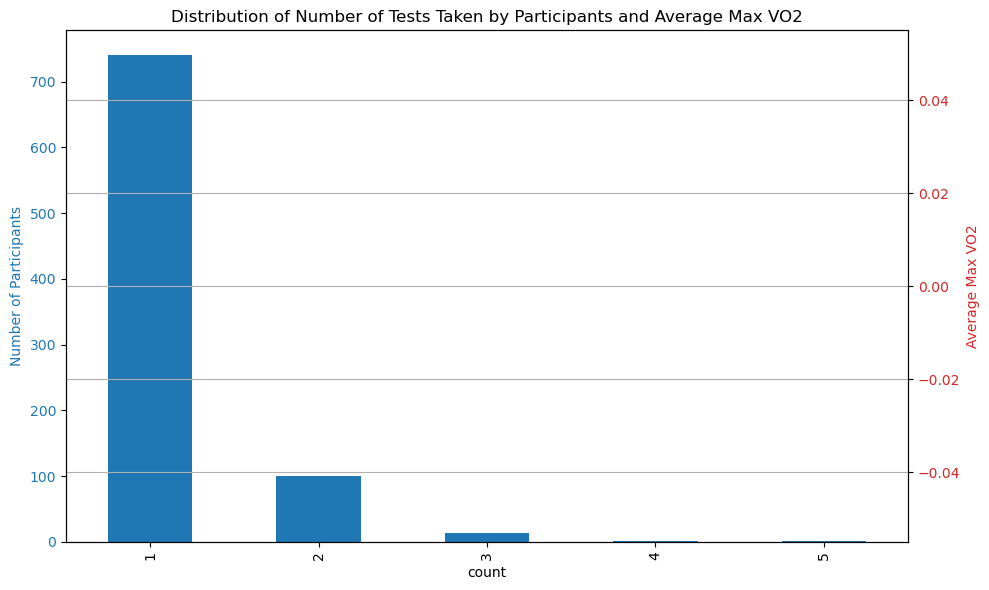

In [20]:
import matplotlib.pyplot as plt

# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Calculate the maximum VO2 for each participant
max_vo2_per_participant = test_measure.groupby('ID')['VO2'].max()

# Calculate the average maximum VO2 for each number of tests group
average_max_vo2 = test_measure.groupby('ID_test')['VO2'].mean().groupby(tests_per_participant).mean().sort_index()

# Plot the bar graph
print(f"Number of participants: {num_participants}")
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Tests')
ax1.set_ylabel('Number of Participants', color=color)
grouped_tests.plot(kind='bar', color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the line graph
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Max VO2', color=color)
average_max_vo2.plot(kind='line', marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Distribution of Number of Tests Taken by Participants and Average Max VO2')
plt.grid(axis='y')
fig.tight_layout()
plt.show()


Number of participants: 857


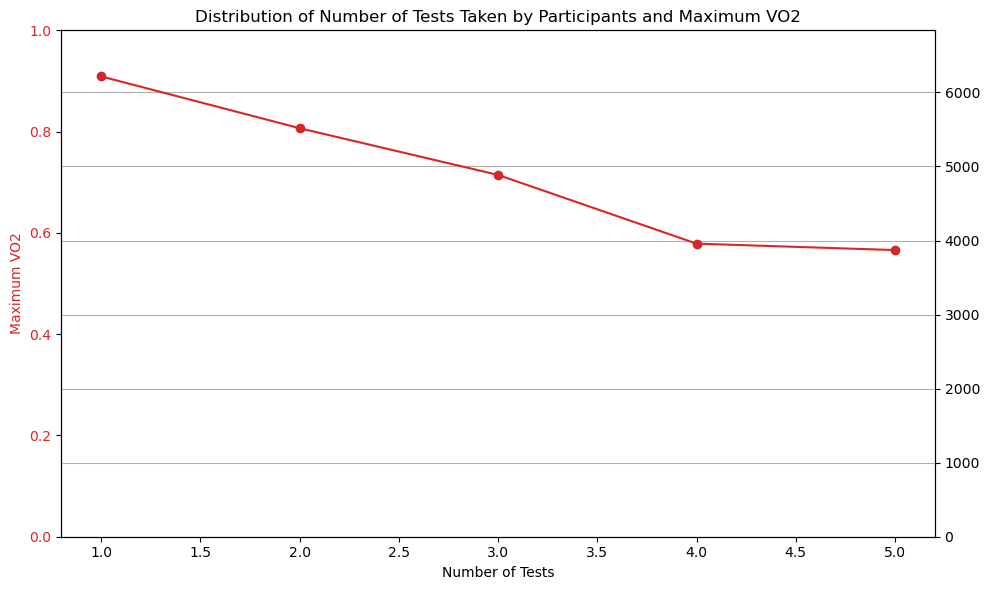

In [34]:
import matplotlib.pyplot as plt

# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Assuming you have a DataFrame named 'test_measure' with columns 'ID' and 'VO2'
# Calculate the maximum VO2 for each participant
max_vo2_per_participant = test_measure.groupby('ID')['VO2'].max()

# Merge the data to get the number of tests for each participant
data = subject_info.merge(max_vo2_per_participant, on='ID')
data['tests_per_participant'] = tests_per_participant

# Group by the number of tests and calculate the maximum VO2 for each group
max_vo2_per_group = data.groupby('tests_per_participant')['VO2'].max().sort_index()

# Plot the bar graph
print(f"Number of participants: {num_participants}")
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Number of Tests')


# Create a second y-axis for the line graph
ax2 = ax1.twinx()
color = 'tab:red'
ax1.set_ylabel('Maximum VO2', color=color)
max_vo2_per_group.plot(kind='line', marker='o', color=color, ax=ax2)
ax1.tick_params(axis='y', labelcolor=color)

# Increase the y-axis range for the line graph
ax2.set_ylim(0, max_vo2_per_group.max() * 1.1)

plt.title('Distribution of Number of Tests Taken by Participants and Maximum VO2')
plt.grid(axis='y')
fig.tight_layout()
plt.show()


In [26]:
max_vo2_per_group

tests_per_participant
1.0    6217.0
2.0    5517.0
3.0    4886.0
4.0    3958.0
5.0    3871.0
Name: VO2, dtype: float64

In [28]:
max_vo2_per_participant

ID
1      3267.0
2      2833.0
3      3692.0
4      4110.0
5      4053.0
        ...  
853    3491.0
854    5661.0
855    2956.0
856    3391.0
857    3002.0
Name: VO2, Length: 857, dtype: float64

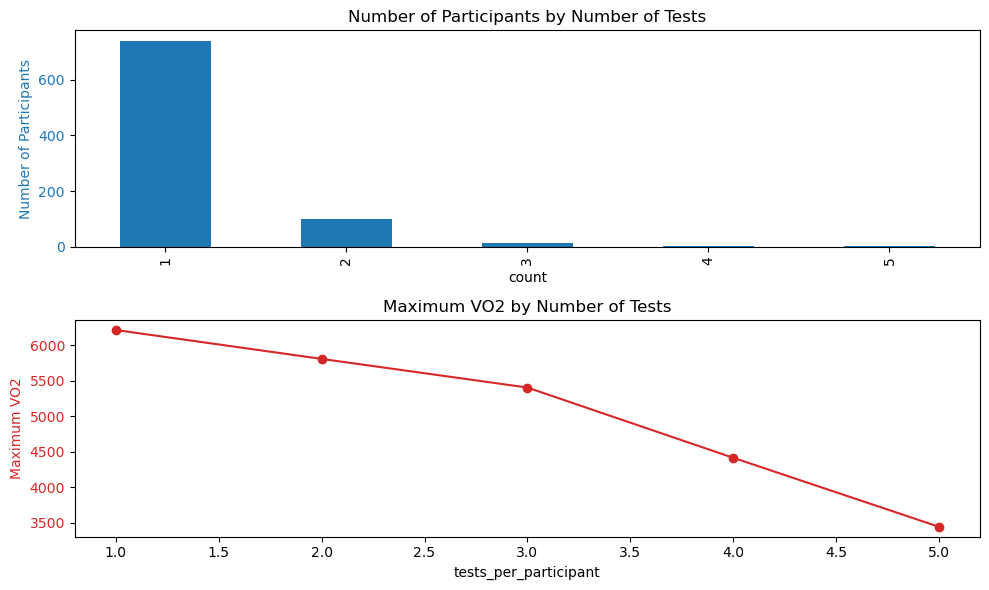

In [11]:
import matplotlib.pyplot as plt

# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Calculate the maximum VO2 for each participant
max_vo2_per_participant = test_measure.groupby('ID')['VO2'].max()

# Merge the data to get the number of tests for each participant
data = subject_info.merge(max_vo2_per_participant, on='ID')
data['tests_per_participant'] = data['ID'].map(tests_per_participant)

# Group by the number of tests and calculate the maximum VO2 for each group
max_vo2_per_group = data.groupby('tests_per_participant')['VO2'].max().sort_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10, 6))

# Plot the bar graph
color = 'tab:blue'
ax1.set_xlabel('Number of Tests')
ax1.set_ylabel('Number of Participants', color=color)
grouped_tests.plot(kind='bar', color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Number of Participants by Number of Tests')

# Plot the line graph
color = 'tab:red'
ax2.set_xlabel('Number of tests')
ax2.set_ylabel('Maximum VO2', color=color)
max_vo2_per_group.plot(kind='line', marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Maximum VO2 by Number of Tests')

plt.tight_layout()
plt.show()


In [84]:
subject_info

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1
...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1


In [94]:
# Filter the data where time == 0 and Speed <= 5 km/h
filtered_df = test_measure[(test_measure['time'] == 0) & (test_measure['Speed'] < 5)]

# Select the relevant columns
result = filtered_df[['ID', 'ID_test']]

# Display the result
result.nunique()

ID         293
ID_test    315
dtype: int64

In [96]:
result

,ID,ID_test
1207,4,4_1
7433,1,1_1
26030,40,40_1
113228,163,163_1
164669,247,247_1
...,...,...
571591,855,855_6
572209,855,855_1
572828,856,856_3
573447,856,856_2


In [98]:
# Filter the data where time == 0 and Speed <= 5 km/h
filtered_df = test_measure[(test_measure['time'] == 0) & (test_measure['Speed'] < 5)]

# Select the relevant columns
result = filtered_df[['ID', 'ID_test']]

# Display the result as count 
print(result.nunique())
result

ID         293
ID_test    315
dtype: int64


,ID,ID_test
1207,4,4_1
7433,1,1_1
26030,40,40_1
113228,163,163_1
164669,247,247_1
...,...,...
571591,855,855_6
572209,855,855_1
572828,856,856_3
573447,856,856_2


In [100]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

In [110]:
# Find the participant with the maximum number of tests
max_tests_participant = tests_per_participant.idxmax()
max_tests_count = tests_per_participant.max()

# Filter the data for participant ID = 506
subject_info_filtered = subject_info[subject_info['ID'] == 506]
test_measure_filtered = test_measure[test_measure['ID'] == 506]

# Merge the dataframes on 'ID' and 'ID_test'
merged_df = pd.merge(subject_info_filtered, test_measure_filtered, on=['ID', 'ID_test'])

# Create a pivot table with summary statistics
pivot_table = merged_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the participant with the maximum number of tests
max_tests_participant = tests_per_participant.idxmax()
max_tests_count = tests_per_participant.max()
print(f"Participant with the maximum number of tests: {max_tests_participant} with {max_tests_count} tests.")

# Display the pivot table with summary statistics
print("\nPivot Table with Summary Statistics:")
print(pivot_table)

Participant with the maximum number of tests: 506 with 5 tests.

Pivot Table with Summary Statistics:
               mean                                                  min      \
                 HR         RR      Speed          VO2        time    HR  RR   
ID_test                                                                        
506_1    131.109034  31.713396   9.025857  1924.266355  729.736760  83.0  15   
506_10   140.119926  32.963100  10.015314  2206.243542  648.708487  78.0  15   
506_18   136.300000  33.429017  10.267083  2108.453978  783.271451  72.0  13   
506_21   130.450593  28.532417   8.642829  1933.062868  685.799607  75.0  12   
506_26   139.019048  32.687619   9.609905  1978.752381  584.963810  55.0  12   

                             max                          
        Speed    VO2 time     HR  RR Speed     VO2  time  
ID_test                                                   
506_1     5.0  208.0    0  178.0  59  17.0  3175.0  1316  
506_10    5.0  438.0 

In [116]:
# Calculate statistical measures
param_stats = merged_df.groupby('ID_test').agg(['mean', 'std', 'min', 'max'])
print(f"Statistical measures for participant 506: \n{param_stats}")


Statistical measures for participant 506: 
          Age                  Weight                  Height       ...  \
         mean  std   min   max   mean  std   min   max   mean  std  ...   
ID_test                                                             ...   
506_1    46.1  0.0  46.1  46.1   72.0  0.0  72.0  72.0  173.0  0.0  ...   
506_10   46.8  0.0  46.8  46.8   69.5  0.0  69.5  69.5  173.0  0.0  ...   
506_18   47.7  0.0  47.7  47.7   68.0  0.0  68.0  68.0  173.0  0.0  ...   
506_21   48.2  0.0  48.2  48.2   70.9  0.0  70.9  70.9  177.2  0.0  ...   
506_26   49.1  0.0  49.1  49.1   71.5  0.0  71.5  71.5  173.0  0.0  ...   

          VCO2                 RR                            VE             \
           min     max       mean        std min max       mean        std   
ID_test                                                                      
506_1    238.0  4251.0  31.713396   8.277864  15  59  61.811526  28.836933   
506_10   390.0  3926.0  32.963100  10.544621

In [118]:
param_stats 

Age                  Weight                  Height       ...  \
         mean  std   min   max   mean  std   min   max   mean  std  ...   
ID_test                                                             ...   
506_1    46.1  0.0  46.1  46.1   72.0  0.0  72.0  72.0  173.0  0.0  ...   
506_10   46.8  0.0  46.8  46.8   69.5  0.0  69.5  69.5  173.0  0.0  ...   
506_18   47.7  0.0  47.7  47.7   68.0  0.0  68.0  68.0  173.0  0.0  ...   
506_21   48.2  0.0  48.2  48.2   70.9  0.0  70.9  70.9  177.2  0.0  ...   
506_26   49.1  0.0  49.1  49.1   71.5  0.0  71.5  71.5  173.0  0.0  ...   

          VCO2                 RR                            VE             \
           min     max       mean        std min max       mean        std   
ID_test                                                                      
506_1    238.0  4251.0  31.713396   8.277864  15  59  61.811526  28.836933   
506_10   390.0  3926.0  32.963100  10.544621  15  59  65.544096  28.758709   
506_18   488.0  3560.0  33.429017  11.864009  13  64  65.599844  28.841615   
506_21   409.0  3807.0  28.532417   9.525010  12  51  58.489587  28.342178   
506_26   194.0  3568.0  32.687619   8.692232  12  51  65.677143  27.789337   

                      
          min    max  
ID_test               
506_1    11.8  129.3  
506_10   16.1  125.4  
506_18   15.5  123.0  
506_21   14.4  113.1  
506_26    8.2  114.6  

[5 rows x 56 columns]

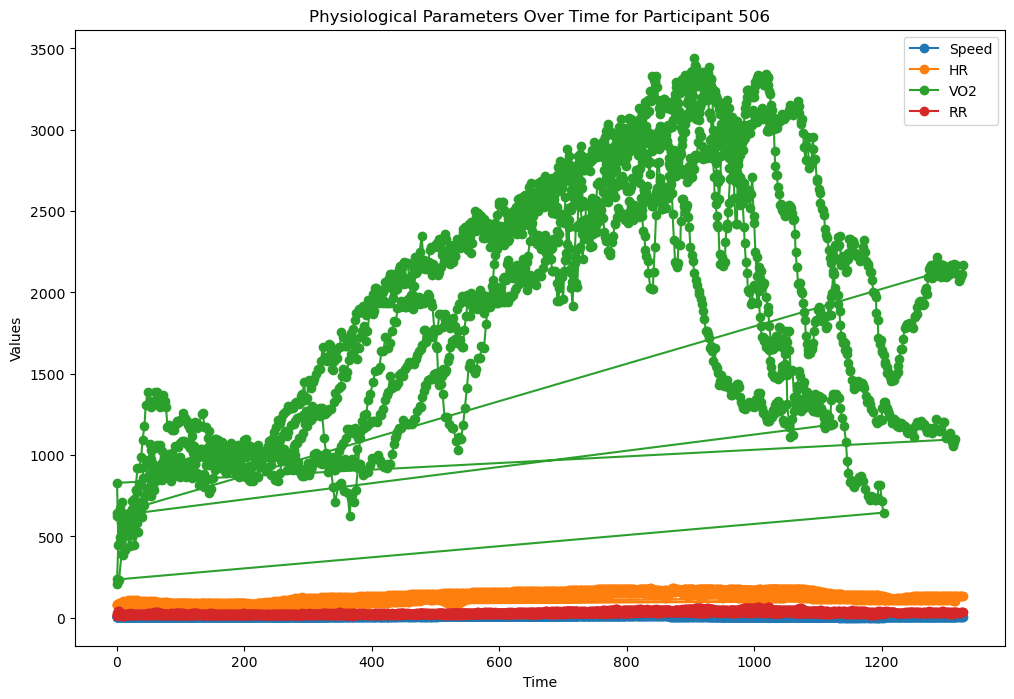

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for param in ['Speed', 'HR', 'VO2', 'RR']:
    plt.plot(merged_df['time'], merged_df[param], marker='o', label=param)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Physiological Parameters Over Time for Participant 506')
plt.legend()
plt.show()


In [19]:
df=test_measure.copy()

In [20]:
# Step 1: Calculate warm-up time
warm_up_end_time = df[(df['Speed'] > 5)].iloc[0]['time'] if not df[df['Speed'] > 5].empty else None
warm_up_time = warm_up_end_time - df.iloc[0]['time'] if warm_up_end_time is not None else None

# Step 2: Determine cool-down start time based on max Speed and max VO2
max_speed_time = df[df['Speed'] == df['Speed'].max()].iloc[0]['time']
max_vo2_time = df[df['VO2'] == df['VO2'].max()].iloc[0]['time']
cool_down_start_time = max(max_speed_time, max_vo2_time)

# Step 3: Determine cool-down end time
cool_down_end_time = df.iloc[-1]['time']

# Step 4: Calculate GET time
get_start_time = warm_up_end_time
get_end_time = cool_down_start_time
get_time = get_end_time - get_start_time if warm_up_end_time is not None else None

# Step 5: Calculate cool-down time
cool_down_time = cool_down_end_time - cool_down_start_time

# Step 6: Verify total time
total_time = cool_down_end_time - df.iloc[0]['time']
verified_time = (warm_up_time if warm_up_time is not None else 0) + get_time + cool_down_time

# Replace any NoneType values with 0 for the calculation
warm_up_time = warm_up_time if warm_up_time is not None else 0
get_time = get_time if get_time is not None else 0
cool_down_time = cool_down_time if cool_down_time is not None else 0

# Step 6: Verify total time
verified_time = warm_up_time + get_time + cool_down_time

# Display results
print(f"Warm-up time: {warm_up_time} minutes")
print(f"GET time: {get_time} minutes")
print(f"Cool-down time: {cool_down_time} minutes")
print(f"Total time: {total_time} minutes")
print(f"Verified time (sum of all phases): {verified_time} minutes")


Warm-up time: 176 minutes
GET time: 1057 minutes
Cool-down time: -300 minutes
Total time: 933 minutes
Verified time (sum of all phases): 933 minutes


In [26]:
# Function to calculate times for each ID_test
def calculate_times(group):
    # Step 1: Warm-up time
    warm_up_rows = group[group['Speed'] > 5]
    warm_up_end_time = warm_up_rows['time'].iloc[0] if not warm_up_rows.empty else None
    warm_up_time = warm_up_end_time - group['time'].iloc[0] if warm_up_end_time is not None else 0

    # Step 2: Cool-down start time
    max_speed_time = group[group['Speed'] == group['Speed'].max()]['time'].iloc[0] if not group[group['Speed'] == group['Speed'].max()].empty else group['time'].iloc[0]
    max_vo2_time = group[group['VO2'] == group['VO2'].max()]['time'].iloc[0] if not group[group['VO2'] == group['VO2'].max()].empty else group['time'].iloc[0]
    cool_down_start_time = max(max_speed_time, max_vo2_time)

    # Step 3: Cool-down end time
    cool_down_end_time = group['time'].iloc[-1]

    # Step 4: GET time
    get_start_time = warm_up_end_time if warm_up_end_time is not None else group['time'].iloc[0]
    get_end_time = cool_down_start_time
    get_time = get_end_time - get_start_time

    # Step 5: Cool-down time
    cool_down_time = cool_down_end_time - cool_down_start_time

    return pd.Series({
        'Warm_up_time': warm_up_time,
        'GET_time': get_time,
        'Cool_down_time': cool_down_time,
        'Total_time': cool_down_end_time - group['time'].iloc[0]
    })

# Apply the calculation for each ID_test
result = df.groupby('ID_test').apply(calculate_times)

# Display the result
print(result)

         Warm_up_time  GET_time  Cool_down_time  Total_time
ID_test                                                    
100_1             178       667             181        1026
101_1             173       656             195        1024
102_1             169       507             194         870
103_1              43       629             189         861
104_1             137       826             181        1144
...               ...       ...             ...         ...
98_1              181       796             228        1205
99_1              186       551             190         927
99_47             173       407             188         768
99_54              47       671             181         899
9_1               204       472             219         895

[992 rows x 4 columns]


In [28]:
result.describe()

,Warm_up_time,GET_time,Cool_down_time,Total_time
count,992.000000,992.000000,992.000000,992.000000
mean,213.473790,669.133065,209.419355,1092.026210
std,127.507295,154.731578,46.163024,182.960653
min,0.000000,203.000000,67.000000,495.000000
25%,171.000000,580.750000,186.000000,978.750000
50%,176.000000,688.000000,193.000000,1093.000000
75%,237.250000,784.000000,220.000000,1208.000000
max,710.000000,1077.000000,423.000000,1712.000000


In [30]:
result.isna().sum()

Warm_up_time      0
GET_time          0
Cool_down_time    0
Total_time        0
dtype: int64

In [34]:
df1=test_measure.copy()

In [36]:
df2=result.copy()

In [38]:
# Step 1: Calculate Total Time for Each ID_test from the First DataFrame
calculated_times = df1.groupby('ID_test').agg(
    Calculated_total_time=('time', lambda x: x.max() - x.min())
).reset_index()

# Step 2: Merge the DataFrames on ID_test
merged_df = pd.merge(df2, calculated_times, on='ID_test', how='left')

# Step 3: Compare the Total Times
merged_df['Match'] = merged_df['Total_time'] == merged_df['Calculated_total_time']

# Display the results
print(merged_df)

    ID_test  Warm_up_time  GET_time  Cool_down_time  Total_time  \
0     100_1           178       667             181        1026   
1     101_1           173       656             195        1024   
2     102_1           169       507             194         870   
3     103_1            43       629             189         861   
4     104_1           137       826             181        1144   
..      ...           ...       ...             ...         ...   
987    98_1           181       796             228        1205   
988    99_1           186       551             190         927   
989   99_47           173       407             188         768   
990   99_54            47       671             181         899   
991     9_1           204       472             219         895   

     Calculated_total_time  Match  
0                     1026   True  
1                     1024   True  
2                      870   True  
3                      861   True  
4              

In [44]:
merged_df.isnull().sum()

ID_test                  0
Warm_up_time             0
GET_time                 0
Cool_down_time           0
Total_time               0
Calculated_total_time    0
Match                    0
dtype: int64

In [48]:
merged_df['Match'].value_counts()

Match
True    992
Name: count, dtype: int64

In [13]:
subject_info.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1


In [52]:
result.head()

,Warm_up_time,GET_time,Cool_down_time,Total_time
ID_test,,,,
100_1,178,667,181,1026
101_1,173,656,195,1024
102_1,169,507,194,870
103_1,43,629,189,861
104_1,137,826,181,1144


In [54]:
# Merge DataFrames on ID_test
combined_df = pd.merge(subject_info,result, on='ID_test', how='inner')

combined_df

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1,173,548,240,961
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1,112,544,188,844
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1,170,464,178,812
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1,184,622,187,993
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1,191,857,184,1232
...,...,...,...,...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2,323,707,229,1259
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3,313,666,374,1353
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1,234,510,188,932
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1,355,421,280,1056


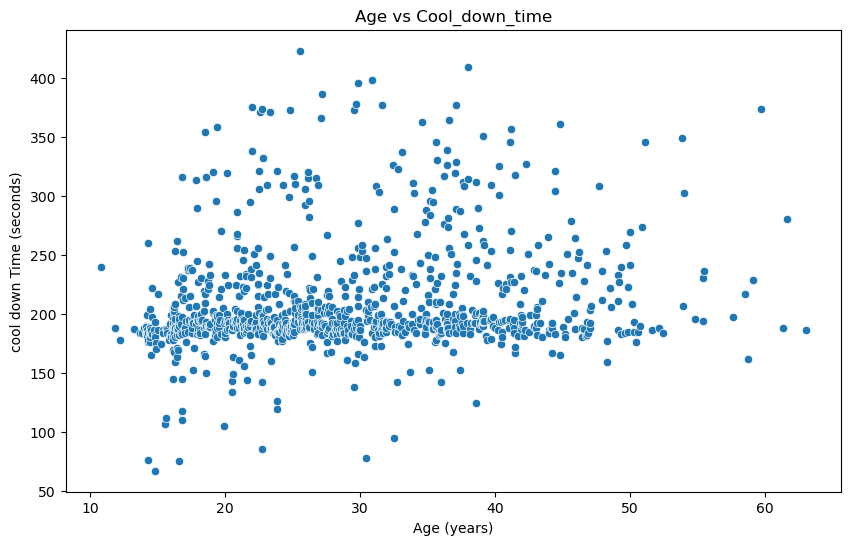

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cool_down_time', data=combined_df)

plt.title('Age vs Cool_down_time')
plt.xlabel('Age (years)')
plt.ylabel('cool down Time (seconds)')
plt.show()

In [64]:
combined_df['Warm_up_time'].value_counts()

Warm_up_time
173    55
174    53
176    45
175    43
172    34
       ..
212     1
244     1
710     1
153     1
323     1
Name: count, Length: 283, dtype: int64

In [66]:

# Find the row with the maximum warm-up time
max_warmup_row = combined_df.loc[combined_df['Warm_up_time'].idxmax()]

print("ID:", max_warmup_row['ID'])
print("ID_test:", max_warmup_row['ID_test'])
print("Warm_up_time:", max_warmup_row['Warm_up_time'])

ID: 735
ID_test: 735_1
Warm_up_time: 710


In [78]:
combined_df[combined_df['ID_test'] == '735_1']

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
429,25.5,80.4,178.0,54.0,23.7,0,735,735_1,710,547,423,1680


In [80]:
# Find the row with the maximum warm-up time
max_GET_row = combined_df.loc[combined_df['GET_time'].idxmax()]

print("ID:", max_GET_row['ID'])
print("ID_test:", max_GET_row['ID_test'])
print("Warm_up_time:", max_GET_row['Warm_up_time'])

ID: 431
ID_test: 431_1
Warm_up_time: 156


In [84]:
combined_df[combined_df['ID'] == 506]

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
928,46.1,72.0,173.0,45.0,24.4,0,506,506_1,355,714,247,1316
937,46.8,69.5,173.0,39.0,21.6,0,506,506_10,208,723,193,1124
945,47.7,68.0,173.0,66.0,25.0,0,506,506_18,182,837,308,1327
948,48.2,70.9,177.2,39.0,26.2,0,506,506_21,287,663,253,1203
953,49.1,71.5,173.0,60.0,26.3,0,506,506_26,167,694,186,1047


In [86]:
combined_df[combined_df['ID'] == 492]

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
598,30.5,82.0,185.0,52.0,23.8,0,492,492_1,112,784,194,1090
628,31.5,84.5,185.2,43.0,25.8,0,492,492_31,135,796,193,1124
642,31.9,84.0,185.0,49.0,23.7,0,492,492_45,175,867,188,1230
654,32.5,82.5,185.0,45.0,29.3,0,492,492_57,233,832,95,1160


In [9]:
# Function to calculate times for each athlete test
def calculate_times(group):
    # Warm-up time
    warm_up_rows = group[group['Speed'] > 5]
    warm_up_end_time = warm_up_rows['time'].iloc[0] if not warm_up_rows.empty else None
    warm_up_time = warm_up_end_time - group['time'].iloc[0] if warm_up_end_time is not None else 0

    # Cool-down start time
    max_speed_time = group[group['Speed'] == group['Speed'].max()]['time'].iloc[0] if not group[group['Speed'] == group['Speed'].max()].empty else group['time'].iloc[0]
    max_vo2_time = group[group['VO2'] == group['VO2'].max()]['time'].iloc[0] if not group[group['VO2'] == group['VO2'].max()].empty else group['time'].iloc[0]
    cool_down_start_time = max(max_speed_time, max_vo2_time)

    # Cool-down end time
    cool_down_end_time = group['time'].iloc[-1]

    # GET time
    get_start_time = warm_up_end_time if warm_up_end_time is not None else group['time'].iloc[0]
    get_end_time = cool_down_start_time
    get_time = get_end_time - get_start_time

    # Cool-down time
    cool_down_time = cool_down_end_time - cool_down_start_time

    return pd.Series({
        'Warm_up_time': warm_up_time,
        'GET_time': get_time,
        'Cool_down_time': cool_down_time,
        'Total_time': cool_down_end_time - group['time'].iloc[0]
    })

# Apply the calculation for each athlete test
result = df.groupby('ID_test').apply(calculate_times)

# Find the athlete test with the maximum GET time
max_get_time_athlete = result[result['GET_time'] == result['GET_time'].max()]

# Display the result
print("Times for each athlete test:")
print(result)
print("\nAthlete with the maximum GET time:")
print(max_get_time_athlete)

Times for each athlete test:
         Warm_up_time  GET_time  Cool_down_time  Total_time
ID_test                                                    
100_1             178       667             181        1026
101_1             173       656             195        1024
102_1             169       507             194         870
103_1              43       629             189         861
104_1             137       826             181        1144
...               ...       ...             ...         ...
98_1              181       796             228        1205
99_1              186       551             190         927
99_47             173       407             188         768
99_54              47       671             181         899
9_1               204       472             219         895

[992 rows x 4 columns]

Athlete with the maximum GET time:
         Warm_up_time  GET_time  Cool_down_time  Total_time
ID_test                                                    
431_1      

In [11]:
result

,Warm_up_time,GET_time,Cool_down_time,Total_time
ID_test,,,,
100_1,178,667,181,1026
101_1,173,656,195,1024
102_1,169,507,194,870
103_1,43,629,189,861
104_1,137,826,181,1144
...,...,...,...,...
98_1,181,796,228,1205
99_1,186,551,190,927
99_47,173,407,188,768


In [15]:
# Merge DataFrames on ID_test
combined_df = pd.merge(subject_info,result, on='ID_test', how='inner')

combined_df

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1,173,548,240,961
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1,112,544,188,844
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1,170,464,178,812
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1,184,622,187,993
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1,191,857,184,1232
...,...,...,...,...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2,323,707,229,1259
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3,313,666,374,1353
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1,234,510,188,932
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1,355,421,280,1056


In [17]:
combined_df[combined_df['ID_test'] == '431_1']

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm_up_time,GET_time,Cool_down_time,Total_time
148,18.0,63.0,171.0,62.0,22.2,0,431,431_1,156,1077,187,1420


In [19]:
test_measure[test_measure['ID_test']=='431_1']

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
287073,0,5.0,62.0,375.0,418.0,24,17.3,431_1,431
287074,2,5.0,61.0,521.0,523.0,35,23.7,431_1,431
287075,3,5.0,64.0,485.0,431.0,67,23.3,431_1,431
287076,4,5.0,65.0,509.0,493.0,46,23.6,431_1,431
287077,6,5.0,67.0,527.0,507.0,46,23.7,431_1,431
...,...,...,...,...,...,...,...,...,...
288076,1414,5.0,120.0,1384.0,1818.0,41,66.1,431_1,431
288077,1415,5.0,120.0,1407.0,1816.0,41,66.4,431_1,431
288078,1417,5.0,120.0,1389.0,1801.0,41,66.1,431_1,431
288079,1418,5.0,80.0,1389.0,1801.0,41,66.1,431_1,431


In [23]:
# Compute the Spearman correlation matrix
spearman_corr = df.corr(method="spearman")

# Find the two variables/features with the highest positive correlation
most_correlated = spearman_corr.unstack().sort_values(ascending=False)

# Exclude self-correlation (correlation of a variable with itself)
most_correlated = most_correlated[most_correlated < 1]

# Display the two most positively correlated variables
top_two = most_correlated.head(5)
print("Top 2 positively correlated variables:")
print(top_two)

Top 2 positively correlated variables:
VE    VCO2    0.962730
VCO2  VE      0.962730
VO2   VCO2    0.941996
VCO2  VO2     0.941996
VO2   VE      0.893654
dtype: float64


In [29]:
df.corr()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
time,1.000000,0.350081,0.551534,0.509239,0.648616,0.527979,0.676877,0.038901,0.065151
Speed,0.350081,1.000000,0.691099,0.793023,0.708669,0.623414,0.694171,0.013926,-0.059752
HR,0.551534,0.691099,1.000000,0.762770,0.782267,0.690038,0.771346,-0.020958,-0.065773
VO2,0.509239,0.793023,0.762770,1.000000,0.934997,0.625718,0.885902,0.006917,-0.030847
VCO2,0.648616,0.708669,0.782267,0.934997,1.000000,0.674291,0.954413,0.010066,0.041808
RR,0.527979,0.623414,0.690038,0.625718,0.674291,1.000000,0.770270,0.012551,-0.052211
VE,0.676877,0.694171,0.771346,0.885902,0.954413,0.770270,1.000000,0.015558,0.011812
ID_test,0.038901,0.013926,-0.020958,0.006917,0.010066,0.012551,0.015558,1.000000,0.116606
ID,0.065151,-0.059752,-0.065773,-0.030847,0.041808,-0.052211,0.011812,0.116606,1.000000


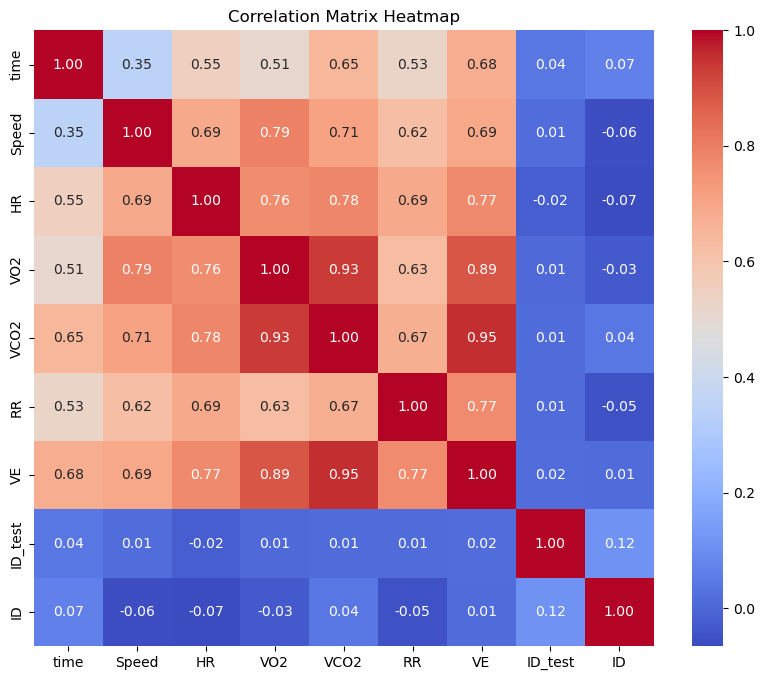

In [35]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add a title
plt.title("Correlation Matrix Heatmap")
plt.show()

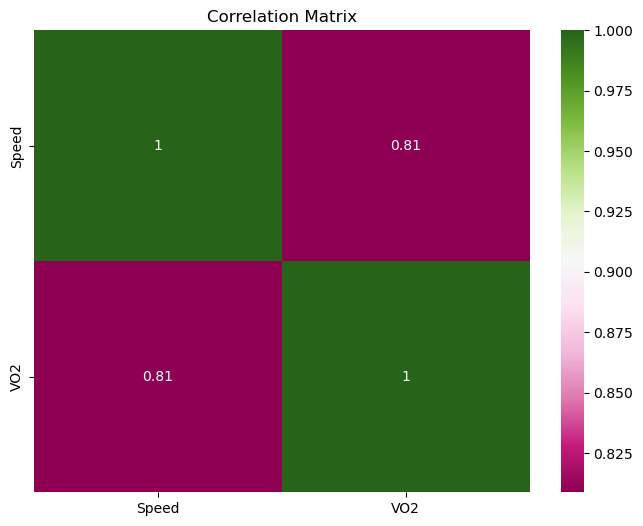

In [43]:
#function to display a correlation matrix
def cor_matrix (df):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(),cmap='PiYG',annot=True)
    plt.title('Correlation Matrix');

#  function  call
warmup_exclude_df = test_measure[test_measure['Speed']>5]
cor_matrix(warmup_exclude_df[['Speed','VO2']])

In [45]:
# Compute the Pearson correlation matrix
pearson_corr = df.corr(method="pearson")

# Find the two variables/features with the highest positive correlation
most_correlated = pearson_corr.unstack().sort_values(ascending=False)

# Exclude self-correlation (correlation of a variable with itself)
most_correlated = most_correlated[most_correlated < 1]

# Display the two most positively correlated variables
top_two = most_correlated.head(5)
print("Top 2 positively correlated variables:")
print(top_two)


Top 2 positively correlated variables:
VE    VCO2    0.954413
VCO2  VE      0.954413
      VO2     0.934997
VO2   VCO2    0.934997
      VE      0.885902
dtype: float64


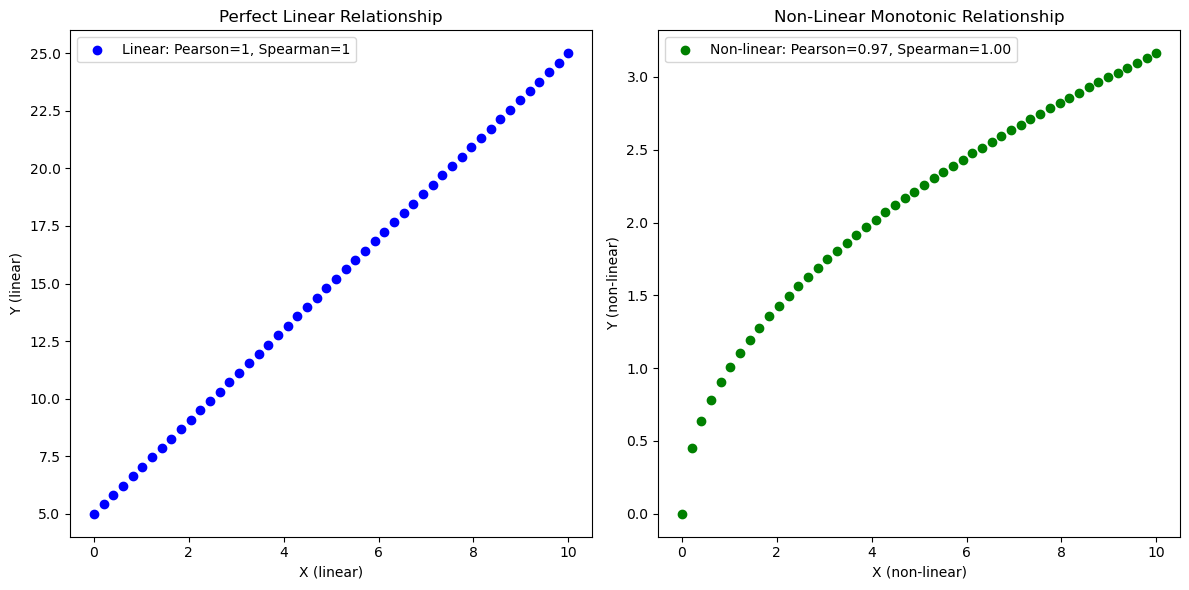

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Simulate data
x_linear = np.linspace(0, 10, 50)  # Linearly increasing x
y_linear = 2 * x_linear + 5        # Perfect linear relationship (Pearson = 1)

x_nonlinear = np.linspace(0, 10, 50)
y_nonlinear = np.sqrt(x_nonlinear)  # Non-linear monotonic relationship

# Calculate Spearman and Pearson correlations
spearman_corr_nl, _ = spearmanr(x_nonlinear, y_nonlinear)
pearson_corr_nl, _ = pearsonr(x_nonlinear, y_nonlinear)

# Plotting distributions
plt.figure(figsize=(12, 6))

# Linear relationship
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', label=f"Linear: Pearson=1, Spearman=1")
plt.title("Perfect Linear Relationship")
plt.xlabel("X (linear)")
plt.ylabel("Y (linear)")
plt.legend()

# Non-linear relationship
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label=f"Non-linear: Pearson={pearson_corr_nl:.2f}, Spearman={spearman_corr_nl:.2f}")
plt.title("Non-Linear Monotonic Relationship")
plt.xlabel("X (non-linear)")
plt.ylabel("Y (non-linear)")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Calculate the maximum VO2 for each participant
max_vo2_per_participant = test_measure.groupby('ID')['VO2'].max()

# Merge the data to get the number of tests for each participant
data = subject_info.merge(max_vo2_per_participant, on='ID')
data['tests_per_participant'] = data['ID'].map(tests_per_participant)

# Group by the number of tests and calculate the maximum VO2 for each group
max_vo2_per_group = data.groupby('tests_per_participant')['VO2'].max().sort_index()

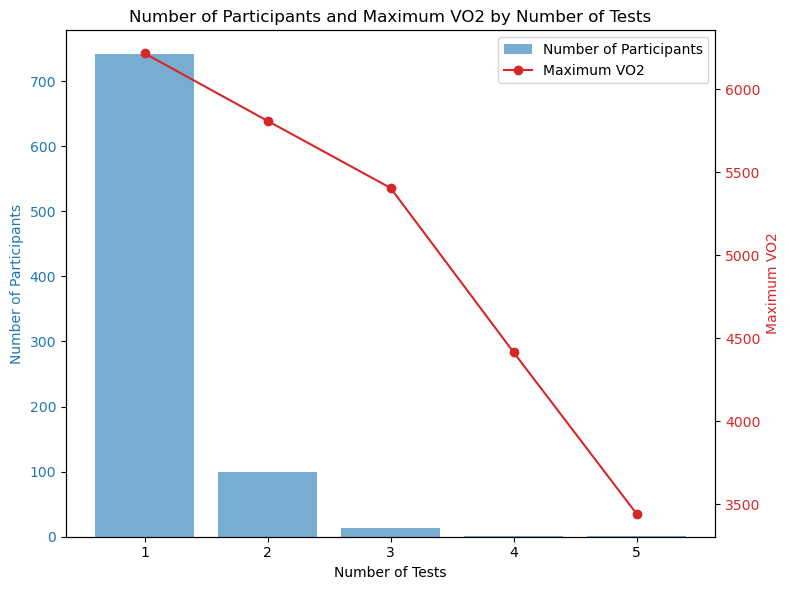

In [13]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar chart: Number of participants by number of tests
color = 'tab:blue'
ax1.bar(grouped_tests.index, grouped_tests.values, color=color, alpha=0.6, label='Number of Participants')
ax1.set_xlabel('Number of Tests')
ax1.set_ylabel('Number of Participants', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Number of Participants and Maximum VO2 by Number of Tests')

# Create a twin y-axis for the line chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(max_vo2_per_group.index, max_vo2_per_group.values, marker='o', color=color, label='Maximum VO2')
ax2.set_ylabel('Maximum VO2', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add legends for clarity
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Tight layout for better spacing
plt.tight_layout()
plt.show()
